In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import sys
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


# remove warnings
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='pandas.io.formats.format')

# 1. Loading Dataset

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

# 1.2 - Function -- Preprocessing

In [8]:
print(os.listdir('/kaggle/usr/lib/'))

['function_v']


In [9]:
sys.path.append("/kaggle/usr/lib/function_v")  # Add directory to the path

import function_v as fn

### Datetime index 

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
new_data1.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City'],
      dtype='object')

In [12]:
# Drop collumns which have large quantity of missing value and of no use
new_data2 = new_data1.drop(['humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City'], axis= 1)

In [13]:
new_data2.isna().sum()

co      0
no2     0
o3      0
pm10    1
pm25    1
so2     0
dtype: int64

### Imputing 

In [14]:
# Fill the missing value 

imputer = SimpleImputer(strategy="mean")

# Select the columns
columns_to_impute = ['pm10', 'pm25']

new_data2[columns_to_impute] = imputer.fit_transform(new_data2[columns_to_impute])

In [15]:
new_data2.isna().sum()

co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64

### Missing Dates

In [16]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [17]:
new_data3 = fn.impute_missing_dates(new_data2)

In [18]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [19]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### AQI Count

In [20]:
new_data4 = fn.calculate_aqi(new_data3)

In [21]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


# 1.3 - Plot & Heatmap

<Axes: >

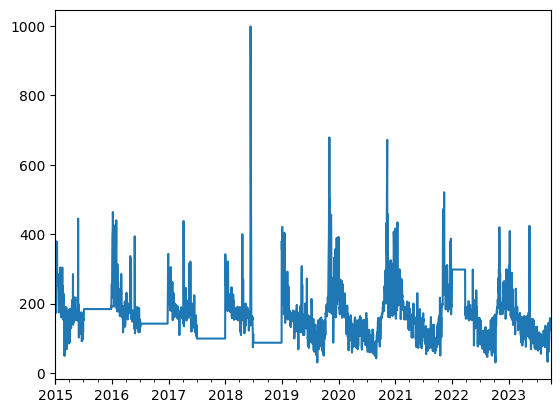

In [22]:
norm_aqi = new_data4['AQI']
norm_aqi.plot()

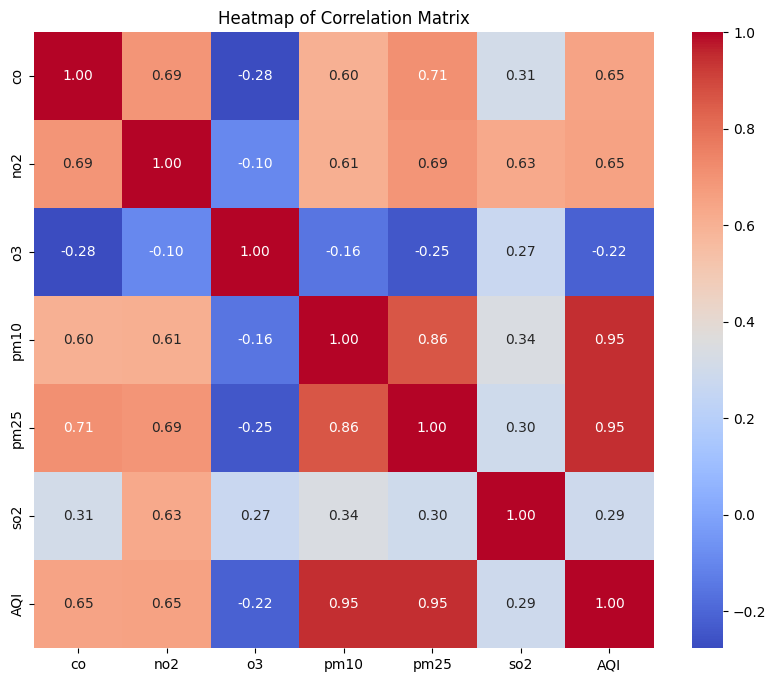

In [23]:
# Calculate the correlation matrix for numeric columns
corr = new_data4.corr(numeric_only=True)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
#file_name = "correlation_matrix.png"
#path = "/kaggle/working/"
#plt.savefig(path + file_name)
plt.show()

# 2. Machine Learning (without scaling)

## 2.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [24]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'AQI'], dtype='object')

In [25]:
data = new_data4.copy()

In [26]:
data.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [27]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'AQI'], dtype='object')
Index([], dtype='object')


In [28]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 6) (2559,) (640, 6) (640,)


In [29]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

## 2.2. ML Model

In [30]:
def compare_and_save_models(X_train, X_test, y_train, y_test, preprocessor, metric='mse', save_dir='models'):
    
    
    # Initialize models
    models = {
        'knn': KNeighborsRegressor(n_neighbors=2),
        'random_forest': RandomForestRegressor(),
        'xgboost': XGBRegressor(objective='reg:squarederror'),
        'svr' : SVR(kernel='linear'),
        'neural_network': MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                     solver='adam', max_iter=2000, 
                                     learning_rate_init=0.0005)
    }
    
    # Dictionary to store results
    results = {}
    
    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('regressor', model)])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'r2_train': r2_score(y_train, y_pred_train),
            'r2_test': r2_score(y_test, y_pred_test),
            'rmse_train': sqrt(mean_squared_error(y_train, y_pred_train)),
            'rmse_test': sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae_train': mean_absolute_error(y_train, y_pred_train),
            'mae_test': mean_absolute_error(y_test, y_pred_test),
            'mse_train': mean_squared_error(y_train, y_pred_train),
            'mse_test': mean_squared_error(y_test, y_pred_test)
        }
        
        results[name] = {
            'pipeline': pipeline,
            'metrics': metrics
        }
    
    # Determine best model based on specified metric
    metric_map = {
        'r2': 'r2_test',
        'rmse': 'rmse_test',
        'mae': 'mae_test',
        'mse': 'mse_test'
    }
    
    comparison_metric = metric_map[metric]
    
    if metric == 'r2':  # Only R² should use max, all others should use min
        best_model = max(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    else:  # For MSE, RMSE, MAE - lower is better
        best_model = min(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    
    # Save the best model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = os.path.join(save_dir, 
                             f'best_model_{best_model[0]}_{timestamp}.joblib')
    joblib.dump(best_model[1]['pipeline'], model_path)
    
    # Prepare return dictionary
    return_dict = {
        'best_model': best_model[0],
        'best_model_path': model_path,
        'model_performances': {name: results[name]['metrics'] 
                             for name in results.keys()}
    }
    
    return return_dict

In [31]:
# Get the results first
results = compare_and_save_models(
    X_train, X_test, y_train, y_test,
    preprocessor,
    metric='mse',
    save_dir='models'
)

In [32]:
# Print detailed results for all models
print("\nDetailed Model Performance Summary:")
print("-" * 50)

for model_name, performance in results['model_performances'].items():
    print(f"\n{model_name.upper()} Results:")
    print(f"R² score (train): {performance['r2_train']:.4f}")
    print(f"R² score (test): {performance['r2_test']:.4f}")
    print(f"RMSE (train): {performance['rmse_train']:.4f}")
    print(f"RMSE (test): {performance['rmse_test']:.4f}")
    print(f"MAE (train): {performance['mae_train']:.4f}")
    print(f"MAE (test): {performance['mae_test']:.4f}")
    print(f"MSE (train): {performance['mse_train']:.4f}")
    print(f"MSE (test): {performance['mse_test']:.4f}")

print("\n" + "=" * 50)
print(f"Best Model: {results['best_model']}")
print(f"Model saved at: {results['best_model_path']}")


Detailed Model Performance Summary:
--------------------------------------------------

KNN Results:
R² score (train): 0.9982
R² score (test): 0.9967
RMSE (train): 3.1271
RMSE (test): 3.8536
MAE (train): 0.9207
MAE (test): 1.4258
MSE (train): 9.7786
MSE (test): 14.8504

RANDOM_FOREST Results:
R² score (train): 0.9983
R² score (test): 0.9962
RMSE (train): 3.0640
RMSE (test): 4.1726
MAE (train): 0.3118
MAE (test): 0.6500
MSE (train): 9.3880
MSE (test): 17.4108

XGBOOST Results:
R² score (train): 1.0000
R² score (test): 0.9884
RMSE (train): 0.2783
RMSE (test): 7.2586
MAE (train): 0.1657
MAE (test): 1.2285
MSE (train): 0.0775
MSE (test): 52.6868

SVR Results:
R² score (train): 0.8857
R² score (test): 0.9390
RMSE (train): 25.0366
RMSE (test): 16.6544
MAE (train): 3.4427
MAE (test): 2.4140
MSE (train): 626.8323
MSE (test): 277.3704

NEURAL_NETWORK Results:
R² score (train): 1.0000
R² score (test): 1.0000
RMSE (train): 0.1014
RMSE (test): 0.2311
MAE (train): 0.0278
MAE (test): 0.0422
MSE (tr

# 3 - Deep Learning Model(Without Scaling)

## 3.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [33]:
aqi_normal = new_data4.copy()

In [34]:
aqi_normal.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [35]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [36]:
WINDOW_SIZE = 6
NUM_FEATURES = 6
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    aqi_normal, WINDOW_SIZE, train_pct, val_pct, test_pct
)

In [37]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2553, 6, 6) (2553,)
Validation shapes: (313, 6, 6) (313,)
Test shapes: (315, 6, 6) (315,)


##  3.2. DL Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

### LSTM(normal)

In [40]:
model5 = Sequential()
model5.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model5.add(LSTM(32, activation='relu', return_sequences=False))  # Single LSTM layer
model5.add(Dense(16, activation='relu')) 
model5.add(Dense(1, activation='linear'))  

cp5 = ModelCheckpoint('/kaggle/working/model5.keras', save_best_only=True)

model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp5])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 39518.2305 - root_mean_squared_error: 198.7332 - val_loss: 38986.2188 - val_root_mean_squared_error: 197.4493
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29242.0195 - root_mean_squared_error: 170.9943 - val_loss: 31529.7324 - val_root_mean_squared_error: 177.5661
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24187.6699 - root_mean_squared_error: 155.4166 - val_loss: 29412.9863 - val_root_mean_squared_error: 171.5022
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16952.2617 - root_mean_squared_error: 130.0061 - val_loss: 20612.8711 - val_root_mean_squared_error: 143.5718
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8356.2803 - root_mean_squared_error: 91.2351 - val_loss: 5968.9521 - val_root_mean_squared_error: 77.2590
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4146.6006 - root_mean_squared_error: 64.1135 - val_loss: 1593.3759 - val_root_mean_squared_error: 3

In [41]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/model5.keras')

In [42]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 20.1767
Mean Squared Error (MSE): 1476.9509
Root Mean Squared Error (RMSE): 38.4311
R-squared (Accuracy): 0.7140


In [43]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 19.4071
Mean Squared Error (MSE): 821.2205
Root Mean Squared Error (RMSE): 28.6569
R-squared (Accuracy): 0.8896


In [44]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 21.8675
Mean Squared Error (MSE): 1145.9861
Root Mean Squared Error (RMSE): 33.8524
R-squared (Accuracy): 0.6532


In [45]:
train_predictions = model5.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Train Predictions,Actuals
0,214.152878,195.0
1,220.386597,185.0
2,195.603287,208.0
3,240.406738,290.0
4,256.470673,267.0
...,...,...
2548,324.992981,387.0
2549,287.305542,169.0
2550,202.589722,197.0
2551,202.717636,191.0


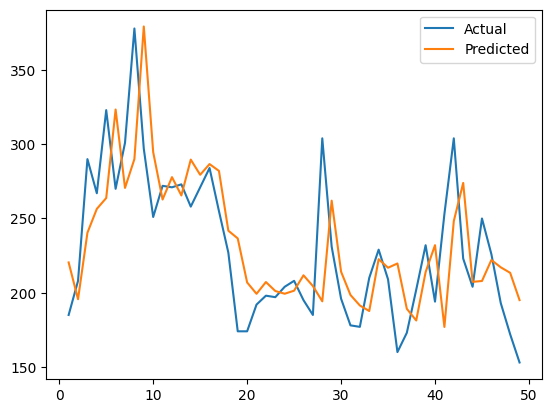

In [46]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [47]:
val_predictions = model5.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,291.648987,298.0
1,300.342041,298.0
2,304.922516,298.0
3,304.922516,298.0
4,304.922516,298.0
...,...,...
308,188.943481,193.0
309,207.165649,199.0
310,215.209564,197.0
311,190.139725,197.0


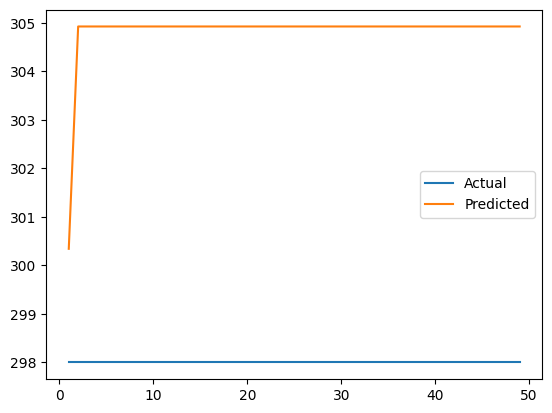

In [48]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [49]:
test_predictions = model5.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Train Predictions,Actuals
0,200.462189,190.0
1,191.677780,177.0
2,175.120880,172.0
3,173.075699,170.0
4,169.631561,197.0
...,...,...
310,154.468445,134.0
311,136.876953,144.0
312,139.981033,155.0
313,150.129532,155.0


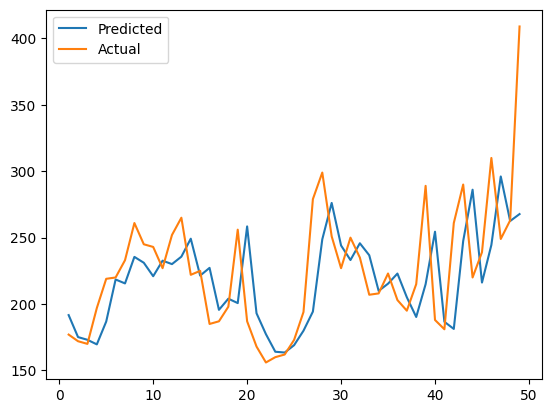

In [50]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

### Hybrid CNN + LSTM¶

In [51]:
model8 = Sequential()
model8.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model8.add(Conv1D(32, kernel_size=2, activation='relu'))  # 1D Convolutional Layer
model8.add(MaxPooling1D(pool_size=2))  # Max Pooling
model8.add(LSTM(64, activation='relu', return_sequences=False))  
model8.add(Dropout(0.3))  
model8.add(Dense(32, activation='relu'))  
model8.add(Dense(1, activation='linear'))  

cp8 = ModelCheckpoint('/kaggle/working/model8.keras', save_best_only=True)

model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model8.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp8])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 29781.4609 - root_mean_squared_error: 172.5472 - val_loss: 29443.4434 - val_root_mean_squared_error: 171.5909
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20674.8789 - root_mean_squared_error: 143.2217 - val_loss: 1633.1166 - val_root_mean_squared_error: 40.4118
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3942.9153 - root_mean_squared_error: 62.6412 - val_loss: 1556.5582 - val_root_mean_squared_error: 39.4532
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3601.7815 - root_mean_squared_error: 59.9026 - val_loss: 1592.6307 - val_root_mean_squared_error: 39.9078
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3505.1292 - root_mean_squared_error: 59.1685 - val_loss: 1524.8589 - val_root_mean_squared_error: 39.0494
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3466.9714 - root_mean_squared_error: 58.7918 - val_loss: 1689.2548 - val_root_mean_squared_error: 41.1005
Epo

In [52]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/model8.keras')

In [53]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 26.5196
Mean Squared Error (MSE): 2423.8195
Root Mean Squared Error (RMSE): 49.2323
R-squared (Accuracy): 0.5306


In [54]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 24.9284
Mean Squared Error (MSE): 1344.0095
Root Mean Squared Error (RMSE): 36.6607
R-squared (Accuracy): 0.8193


In [55]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 25.5204
Mean Squared Error (MSE): 1353.8126
Root Mean Squared Error (RMSE): 36.7942
R-squared (Accuracy): 0.5903


In [56]:
train_predictions = model8.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Train Predictions,Actuals
0,247.148483,195.0
1,189.500092,185.0
2,237.816422,208.0
3,206.577972,290.0
4,197.101883,267.0
...,...,...
2548,290.219513,387.0
2549,297.276123,169.0
2550,300.786987,197.0
2551,243.485367,191.0


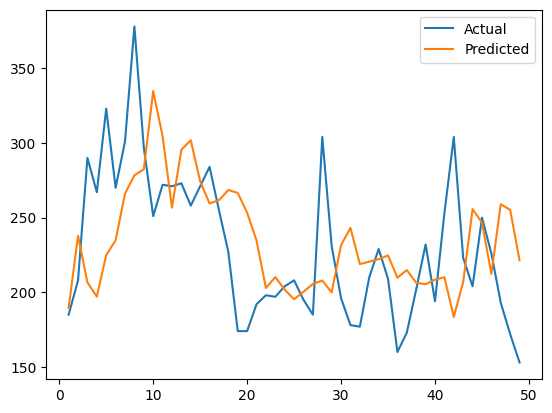

In [57]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [58]:
val_predictions = model8.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Train Predictions,Actuals
0,266.453033,298.0
1,292.923462,298.0
2,291.407532,298.0
3,291.407532,298.0
4,291.407532,298.0
...,...,...
308,237.170792,193.0
309,219.825012,199.0
310,186.174393,197.0
311,210.016403,197.0


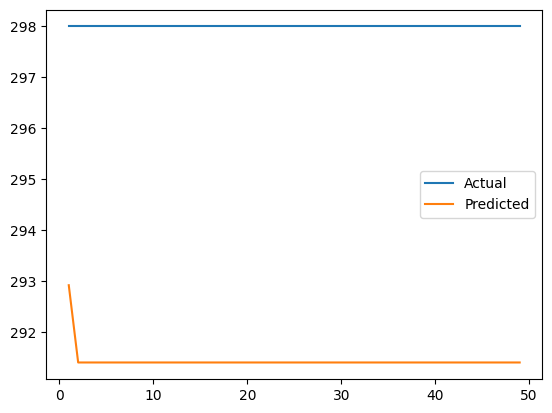

In [59]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [60]:
test_predictions = model8.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Train Predictions,Actuals
0,180.233017,190.0
1,183.733231,177.0
2,182.899994,172.0
3,175.572830,170.0
4,178.419144,197.0
...,...,...
310,142.171890,134.0
311,148.051163,144.0
312,150.818100,155.0
313,151.591080,155.0


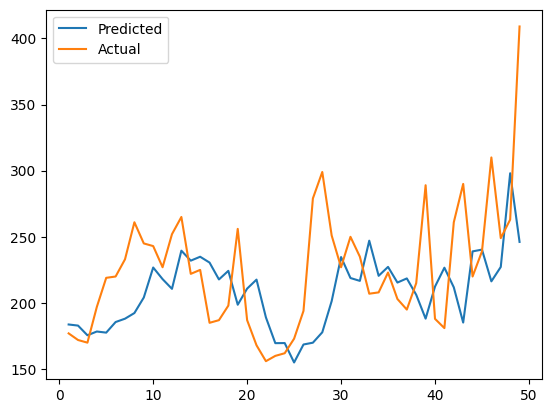

In [61]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

### Advanced Stacked GRU + Dense¶

In [62]:
model9 = Sequential()
model9.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model9.add(BatchNormalization())  # Normalize inputs
model9.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model9.add(Dropout(0.3))  # Dropout for regularization
model9.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model9.add(Dense(32, activation='relu'))  # Fully connected layer
model9.add(Dense(16, activation='relu'))  # Second dense layer
model9.add(Dense(1, activation='linear'))  # Output layer

cp9 = ModelCheckpoint('/kaggle/working/model9.keras', save_best_only=True)

model9.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model9.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp9])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 31290.6934 - root_mean_squared_error: 176.8884 - val_loss: 38842.4844 - val_root_mean_squared_error: 197.0850
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 29703.6465 - root_mean_squared_error: 172.3353 - val_loss: 9893.0771 - val_root_mean_squared_error: 99.4639
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16127.7334 - root_mean_squared_error: 126.7715 - val_loss: 4821.0962 - val_root_mean_squared_error: 69.4341
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7288.2671 - root_mean_squared_error: 85.3079 - val_loss: 3483.7844 - val_root_mean_squared_error: 59.0236
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4557.4819 - root_mean_squared_error: 67.4321 - val_loss: 2564.5247 - val_root_mean_squared_error: 50.6411
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4427.5181 - root_mean_squared_error: 66.4389 - val_loss: 2260.2432 - val_root_mean_squared_error: 47.5420


In [63]:
from tensorflow.keras.models import load_model
model9 = load_model('/kaggle/working/model9.keras')

In [64]:
# Evaluate the model on the train data
train_result = model9.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 19.8803
Mean Squared Error (MSE): 1433.9439
Root Mean Squared Error (RMSE): 37.8675
R-squared (Accuracy): 0.7223


In [65]:
# Evaluate the model on the validation data
val_result = model9.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 17.0236
Mean Squared Error (MSE): 758.2996
Root Mean Squared Error (RMSE): 27.5372
R-squared (Accuracy): 0.8981


In [66]:
# Evaluate the model on the test data
test_result = model9.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 22.0592
Mean Squared Error (MSE): 1108.5773
Root Mean Squared Error (RMSE): 33.2953
R-squared (Accuracy): 0.6645


In [67]:
train_predictions = model9.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,203.550140,195.0
1,203.749603,185.0
2,191.063828,208.0
3,235.162445,290.0
4,267.998718,267.0
...,...,...
2548,370.862244,387.0
2549,326.549683,169.0
2550,205.578522,197.0
2551,229.689438,191.0


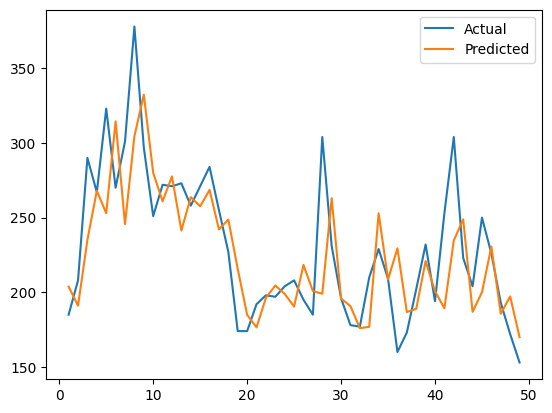

In [68]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [69]:
val_predictions = model9.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,292.141907,298.0
1,297.208496,298.0
2,298.155121,298.0
3,298.155121,298.0
4,298.155121,298.0
...,...,...
308,188.221161,193.0
309,229.591446,199.0
310,202.996628,197.0
311,206.538315,197.0


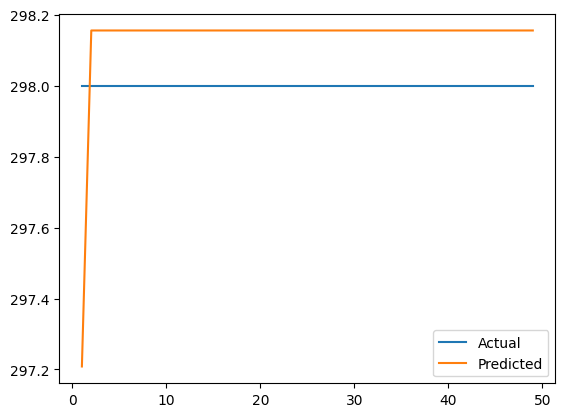

In [70]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [71]:
test_predictions = model9.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,205.573959,190.0
1,197.136246,177.0
2,189.669937,172.0
3,190.079285,170.0
4,184.790344,197.0
...,...,...
310,140.855042,134.0
311,140.651001,144.0
312,148.341171,155.0
313,155.415375,155.0


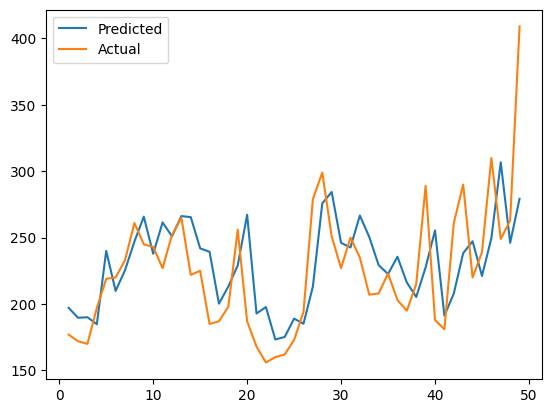

In [72]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# 4. Load Model and export dataset

In [73]:
from joblib import load


# Load the model
model_path = '/kaggle/working/models/best_model_neural_network_20250128_143339.joblib'
model = load(model_path)

# Predict using the model
predictions = model.predict(data)

# Add predictions and location to the original DataFrame
data['Country_City'] = "India_Delhi"
data['predictions'] = predictions

# Function to classify AQI levels
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply AQI bucket classification to the predictions column
data['AQI Bucket'] = data['AQI'].apply(classify_aqi)

# Save the updated DataFrame to CSV
os.makedirs('/kaggle/working', exist_ok=True)

# Save to CSV
data.to_csv('/kaggle/working/india_delhi_predictions.csv')
